In [1]:
!apt-get install wget


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  wget
0 upgraded, 1 newly installed, 0 to remove and 70 not upgraded.
Need to get 367 kB of archives.
After this operation, 1,008 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 wget amd64 1.21.2-2ubuntu1 [367 kB]
Fetched 367 kB in 2s (155 kB/s)
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package wget.
(Reading database ... 23516 files and directories currently installed.)
Preparing to unpack .../wget_1.21.2-2ubuntu1_amd64.deb ...
Unpacking wget (1.21.2-2ubuntu1) ...
Setting up wget (1.21.2-2ubuntu1) ...


In [ ]:
pip install timm
pip install einops
pip install ml_collections

In [2]:
!git clone https://github.com/ristea/aed-mae.git

Cloning into 'aed-mae'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 66 (delta 25), reused 31 (delta 6), pack-reused 0
Receiving objects: 100% (66/66), 42.88 KiB | 618.00 KiB/s, done.
Resolving deltas: 100% (25/25), done.


In [3]:
%cd aed-mae

/notebooks/aed-mae


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
!ls

configs  engine_train.py       inference.py  main.py  README.md
data	 extract_gradients.py  LICENSE	     model    util


In [5]:
!wget http://192.168.1.48:8008/download/avenue.tar.gz

--2024-08-09 22:32:10--  http://192.168.1.48:8008/download/avenue.tar.gz
Connecting to 192.168.1.48:8008... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2225699602 (2.1G) [application/x-tar]
Saving to: ‘avenue.tar.gz’

avenue.tar.gz       100%[===================>]   2.07G  1.82GB/s    in 1.1s    

2024-08-09 22:32:12 (1.82 GB/s) - ‘avenue.tar.gz’ saved [2225699602/2225699602]



In [82]:
%cd /notebooks

/notebooks


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [83]:
!wget https://www.cse.cuhk.edu.hk/leojia/projects/detectabnormal/Avenue_Dataset.zip --no-check-certificate

--2024-08-10 09:42:38--  https://www.cse.cuhk.edu.hk/leojia/projects/detectabnormal/Avenue_Dataset.zip
Resolving www.cse.cuhk.edu.hk (www.cse.cuhk.edu.hk)... 137.189.91.192
Connecting to www.cse.cuhk.edu.hk (www.cse.cuhk.edu.hk)|137.189.91.192|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 813227845 (776M) [application/zip]
Saving to: ‘Avenue_Dataset.zip’

Avenue_Dataset.zip  100%[===================>] 775.55M   240KB/s    in 34m 22s 

2024-08-10 10:17:01 (385 KB/s) - ‘Avenue_Dataset.zip’ saved [813227845/813227845]



In [6]:
import zipfile
import tarfile
import os
from tqdm import tqdm

def extract_zip_with_progress(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        total_files = len(zip_ref.infolist())
        with tqdm(total=total_files, desc="Extracting files") as pbar:
            for file in zip_ref.infolist():
                zip_ref.extract(file, extract_to)
                pbar.update(1)

def extract_tar_with_progress(tar_path, extract_to):
    with tarfile.open(tar_path, 'r:gz') as tar_ref:
        total_files = len(tar_ref.getmembers())
        with tqdm(total=total_files, desc="Extracting files") as pbar:
            for member in tar_ref.getmembers():
                tar_ref.extract(member, extract_to)
                pbar.update(1)

# Example usage
file_path = '/notebooks/aed-mae/avenue.tar.gz'
extract_to = '/notebooks/aed-mae/data'

if file_path.endswith('.zip'):
    extract_zip_with_progress(file_path, extract_to)
elif file_path.endswith('.tar.gz'):
    extract_tar_with_progress(file_path, extract_to)
else:
    print("Unsupported file format")


Extracting files: 100%|██████████| 30694/30694 [00:10<00:00, 2970.40it/s]


In [80]:
!wget https://www.cse.cuhk.edu.hk/leojia/projects/detectabnormal/ground_truth_demo.zip --no-check-certificate

--2024-08-10 08:30:49--  https://www.cse.cuhk.edu.hk/leojia/projects/detectabnormal/ground_truth_demo.zip
Resolving www.cse.cuhk.edu.hk (www.cse.cuhk.edu.hk)... 137.189.91.192
Connecting to www.cse.cuhk.edu.hk (www.cse.cuhk.edu.hk)|137.189.91.192|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 931269 (909K) [application/zip]
Saving to: ‘ground_truth_demo.zip’

ground_truth_demo.z 100%[===================>] 909.44K   634KB/s    in 1.4s    

2024-08-10 08:30:51 (634 KB/s) - ‘ground_truth_demo.zip’ saved [931269/931269]



In [81]:
import zipfile
import tarfile
import os
from tqdm import tqdm

def extract_zip_with_progress(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        total_files = len(zip_ref.infolist())
        with tqdm(total=total_files, desc="Extracting files") as pbar:
            for file in zip_ref.infolist():
                zip_ref.extract(file, extract_to)
                pbar.update(1)

def extract_tar_with_progress(tar_path, extract_to):
    with tarfile.open(tar_path, 'r:gz') as tar_ref:
        total_files = len(tar_ref.getmembers())
        with tqdm(total=total_files, desc="Extracting files") as pbar:
            for member in tar_ref.getmembers():
                tar_ref.extract(member, extract_to)
                pbar.update(1)

# Example usage
file_path = '/notebooks/aed-mae/ground_truth_demo.zip'
extract_to = '/notebooks/aed-mae/data/avenue'

if file_path.endswith('.zip'):
    extract_zip_with_progress(file_path, extract_to)
elif file_path.endswith('.tar.gz'):
    extract_tar_with_progress(file_path, extract_to)
else:
    print("Unsupported file format")


Extracting files: 100%|██████████| 26/26 [00:00<00:00, 928.09it/s]


In [85]:
import zipfile
import tarfile
import os
from tqdm import tqdm

def extract_zip_with_progress(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        total_files = len(zip_ref.infolist())
        with tqdm(total=total_files, desc="Extracting files") as pbar:
            for file in zip_ref.infolist():
                zip_ref.extract(file, extract_to)
                pbar.update(1)

def extract_tar_with_progress(tar_path, extract_to):
    with tarfile.open(tar_path, 'r:gz') as tar_ref:
        total_files = len(tar_ref.getmembers())
        with tqdm(total=total_files, desc="Extracting files") as pbar:
            for member in tar_ref.getmembers():
                tar_ref.extract(member, extract_to)
                pbar.update(1)

# Example usage
file_path = '/notebooks/Avenue_Dataset.zip'
extract_to = '/notebooks'

if file_path.endswith('.zip'):
    extract_zip_with_progress(file_path, extract_to)
elif file_path.endswith('.tar.gz'):
    extract_tar_with_progress(file_path, extract_to)
else:
    print("Unsupported file format")


Extracting files: 100%|██████████| 79/79 [00:01<00:00, 47.18it/s]


In [7]:
!ls

avenue.tar.gz  data		extract_gradients.py  LICENSE  model	  util
configs        engine_train.py	inference.py	      main.py  README.md


In [8]:
!python3 extract_gradients.py 

Processing testing videos: 100%|████████████████| 21/21 [00:46<00:00,  2.21s/it]


In [9]:
!wget http://192.168.1.48:8008/download/UBnormal.zip

--2024-08-09 22:34:05--  http://192.168.1.48:8008/download/UBnormal.zip
Connecting to 192.168.1.48:8008... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16037804331 (15G) [application/zip]
Saving to: ‘UBnormal.zip’

UBnormal.zip        100%[===================>]  14.94G   254MB/s    in 17s     

2024-08-09 22:34:22 (892 MB/s) - ‘UBnormal.zip’ saved [16037804331/16037804331]



In [10]:
import zipfile
import tarfile
import os
from tqdm import tqdm

def extract_zip_with_progress(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        total_files = len(zip_ref.infolist())
        with tqdm(total=total_files, desc="Extracting files") as pbar:
            for file in zip_ref.infolist():
                zip_ref.extract(file, extract_to)
                pbar.update(1)

def extract_tar_with_progress(tar_path, extract_to):
    with tarfile.open(tar_path, 'r:gz') as tar_ref:
        total_files = len(tar_ref.getmembers())
        with tqdm(total=total_files, desc="Extracting files") as pbar:
            for member in tar_ref.getmembers():
                tar_ref.extract(member, extract_to)
                pbar.update(1)

# Example usage
file_path = '/notebooks/aed-mae/UBnormal.zip'
extract_to = '/notebooks/aed-mae/data/UBnormal'

if file_path.endswith('.zip'):
    extract_zip_with_progress(file_path, extract_to)
elif file_path.endswith('.tar.gz'):
    extract_tar_with_progress(file_path, extract_to)
else:
    print("Unsupported file format")


Extracting files: 100%|██████████| 238267/238267 [01:17<00:00, 3073.29it/s]


# แตกไฟล์ตามโครงสร้าง

In [11]:
%cd /notebooks/aed-mae

/notebooks/aed-mae


In [12]:
import os

def summarize_directory_structure(start_path):
    for root, dirs, files in os.walk(start_path):
        level = root.replace(start_path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/ - {len(files)} files')
        for d in dirs:
            subdir = os.path.join(root, d)
            num_files = len([f for f in os.listdir(subdir) if os.path.isfile(os.path.join(subdir, f))])
            print(f'{indent}    {d}/ - {num_files} files')

# Example usage
base_path = '/notebooks/aed-mae/data/UBnormal'
summarize_directory_structure(base_path)


UBnormal/ - 1 files
    Scene5/ - 19 files
    Scene19/ - 16 files
    Scene18/ - 16 files
    Scene9/ - 24 files
    Scene1/ - 27 files
    Scene28/ - 16 files
    Scene24/ - 16 files
    Scene15/ - 18 files
    Scene6/ - 15 files
    Scene11/ - 25 files
    Scene7/ - 28 files
    Scene14/ - 16 files
    Scene21/ - 17 files
    Scene22/ - 17 files
    Scene25/ - 16 files
    Scene10/ - 18 files
    Scene2/ - 13 files
    Scene23/ - 16 files
    Scene16/ - 16 files
    Scene12/ - 18 files
    Scene26/ - 16 files
    Scene29/ - 18 files
    Scene13/ - 25 files
    Scene17/ - 20 files
    Scene4/ - 20 files
    Scene27/ - 18 files
    Scene20/ - 18 files
    Scene3/ - 15 files
    Scene8/ - 26 files
    Scene5/ - 19 files
        normal_scene_5_scenario_3_annotations/ - 451 files
        normal_scene_5_scenario_6_annotations/ - 451 files
        normal_scene_5_scenario_1_annotations/ - 285 files
        abnormal_scene_5_scenario_1_annotations/ - 402 files
        normal_scene_5_scenario_

# สร้างไฟล์ตามโครงสร้าง โดยการ Copy แล้วเอาไปวางตามโครงสร้าง

ubnormal_path/
├── train/
│   ├── frames/
│   │   └── video_name/
│   │       ├── 0000.jpg
│   │       ├── 0001.jpg
│   │       └── ...
│   ├── annotations/
│   │   └── video_name_annotations/
│   │       ├── 0000_gt.png
│   │       ├── 0001_gt.png
│   │       └── tracks.txt
├── abnormal_sequences/
│   └── video_name/
│       ├── sequence_0000/
│       │   ├── masks/
│       │   │   ├── 0000.png
│       │   │   └── ...
│       │   └── anomalies/
│       │       ├── 0000.png
│       │       └── ...
│       └── sequence_0001/
│           ├── masks/
│           └── anomalies/


In [15]:
import os
import shutil
from tqdm import tqdm

def copy_folder_structure(src, dest):
    if not os.path.exists(dest):
        os.makedirs(dest)

    items = os.listdir(src)
    for item in items:
        src_item = os.path.join(src, item)
        dest_item = os.path.join(dest, item)
        
        if os.path.isdir(src_item):
            copy_folder_structure(src_item, dest_item)
        else:
            shutil.copy2(src_item, dest_item)

def reorganize_directory_structure(base_path, output_base_path):
    # สร้างโครงสร้างหลักในตำแหน่งใหม่
    os.makedirs(os.path.join(output_base_path, 'train', 'frames'), exist_ok=True)
    os.makedirs(os.path.join(output_base_path, 'train', 'annotations'), exist_ok=True)
    os.makedirs(os.path.join(output_base_path, 'abnormal_sequences'), exist_ok=True)

    scenes = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d)) and d.startswith('Scene')]
    
    with tqdm(total=len(scenes), desc="Copying scenes", ncols=100, unit="scene") as pbar:
        for scene in scenes:
            scene_path = os.path.join(base_path, scene)
            
            # คัดลอกโฟลเดอร์ annotations
            annotations_folders = [d for d in os.listdir(scene_path) if 'annotations' in d]
            for annotations_folder in annotations_folders:
                annotations_src = os.path.join(scene_path, annotations_folder)
                annotations_dest = os.path.join(output_base_path, 'train', 'annotations', os.path.basename(annotations_src))
                copy_folder_structure(annotations_src, annotations_dest)
            
            # คัดลอกโฟลเดอร์ frames
            frames_src = scene_path
            frames_dest = os.path.join(output_base_path, 'train', 'frames', scene)
            copy_folder_structure(frames_src, frames_dest)
            
            pbar.update(1)

    print(f"Directory structure reorganized at: {output_base_path}")

# ตัวอย่างการใช้งาน
base_path = '/notebooks/aed-mae/data/UBnormal'
output_base_path = '/notebooks/aed-mae/data/UBnormal_Output'
reorganize_directory_structure(base_path, output_base_path)


Copying scenes: 100%|████████████████████████████████████████████| 29/29 [00:43<00:00,  1.51s/scene]

Directory structure reorganized at: /notebooks/aed-mae/data/UBnormal_Output


# ขั้นตอนที่ 2 สร้าง abnormal_sequences

In [16]:
import glob
import os.path

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm


class AbnormalSequences:

    def __init__(self, parser):
        self.frames_path = os.path.join(parser.ubnormal_path, "train", "frames")
        self.annotations = os.path.join(parser.ubnormal_path, "train", "annotations")
        # create path to store abnormal sequences
        os.makedirs(os.path.join(parser.ubnormal_path, "abnormal_sequences"), exist_ok=True)
        self.store_dir_sequences = os.path.join(parser.ubnormal_path, "abnormal_sequences")
        self.args = parser

    def create_abnormal_sequences(self):
        for video in tqdm(os.listdir(self.frames_path)):
            if "abnormal" in video:
                frames = os.listdir(os.path.join(self.frames_path, video))
                annotations = os.listdir(os.path.join(self.annotations, video+"_annotations"))
                annotations = [annotation for annotation in annotations if 'png' in annotation]
                annotations.sort(key = lambda x: int(x.split(".")[0].split("_")[-2]))
                frames.sort(key = lambda x: int(x.split(".")[0]))
                frames = np.array(frames)
                annotations = np.array(annotations)
                tracks = np.loadtxt(os.path.join(self.annotations, video+"_annotations", video+"_tracks.txt"), delimiter=",", dtype=float)
                tracks = tracks.astype(dtype=np.int32)
                if len(tracks.shape)==1:
                   tracks = np.array([tracks])
                for t, track in enumerate(tracks):
                    selected_annotations = annotations[track[1]:track[2]]
                    selected_frames = frames[track[1]:track[2]]
                    object_no = track[0]
                    for i, frame in enumerate(selected_frames):
                        image = cv2.imread(os.path.join(self.frames_path, video, frame))
                        annotation = cv2.imread(os.path.join(self.annotations, video+"_annotations", selected_annotations[i]))
                        mask = (annotation==object_no)*1
                        mask = mask[:image.shape[0],:image.shape[1], :]
                        if mask.sum() < 800:
                            break
                        anomaly = image*mask
                        os.makedirs(os.path.join(self.store_dir_sequences, video, f"sequence_{t:04d}", "masks"), exist_ok=True)
                        os.makedirs(os.path.join(self.store_dir_sequences, video, f"sequence_{t:04d}", "anomalies"), exist_ok=True)
                        anomaly = cv2.resize(anomaly.astype(np.uint8), self.args.target_size)
                        mask*=255
                        mask = cv2.resize(mask.astype(np.uint8), self.args.target_size)
                        cv2.imwrite(os.path.join(self.store_dir_sequences, video, f"sequence_{t:04d}", "anomalies", f"{i}.png"), anomaly)
                        cv2.imwrite(os.path.join(self.store_dir_sequences, video, f"sequence_{t:04d}", "masks", f"{i}.png"), mask)

In [17]:
class Parser:
    def __init__(self, ubnormal_path, target_size):
        self.ubnormal_path = ubnormal_path
        self.target_size = target_size

# กำหนดค่า parser
parser = Parser(ubnormal_path="/notebooks/aed-mae/data/UBnormal_Output", target_size=(224, 224))

# สร้างอินสแตนซ์ของคลาส AbnormalSequences
abnormal_sequences = AbnormalSequences(parser)

# สร้างชุดภาพ anomaly
abnormal_sequences.create_abnormal_sequences()


100%|██████████| 246/246 [00:05<00:00, 41.31it/s]


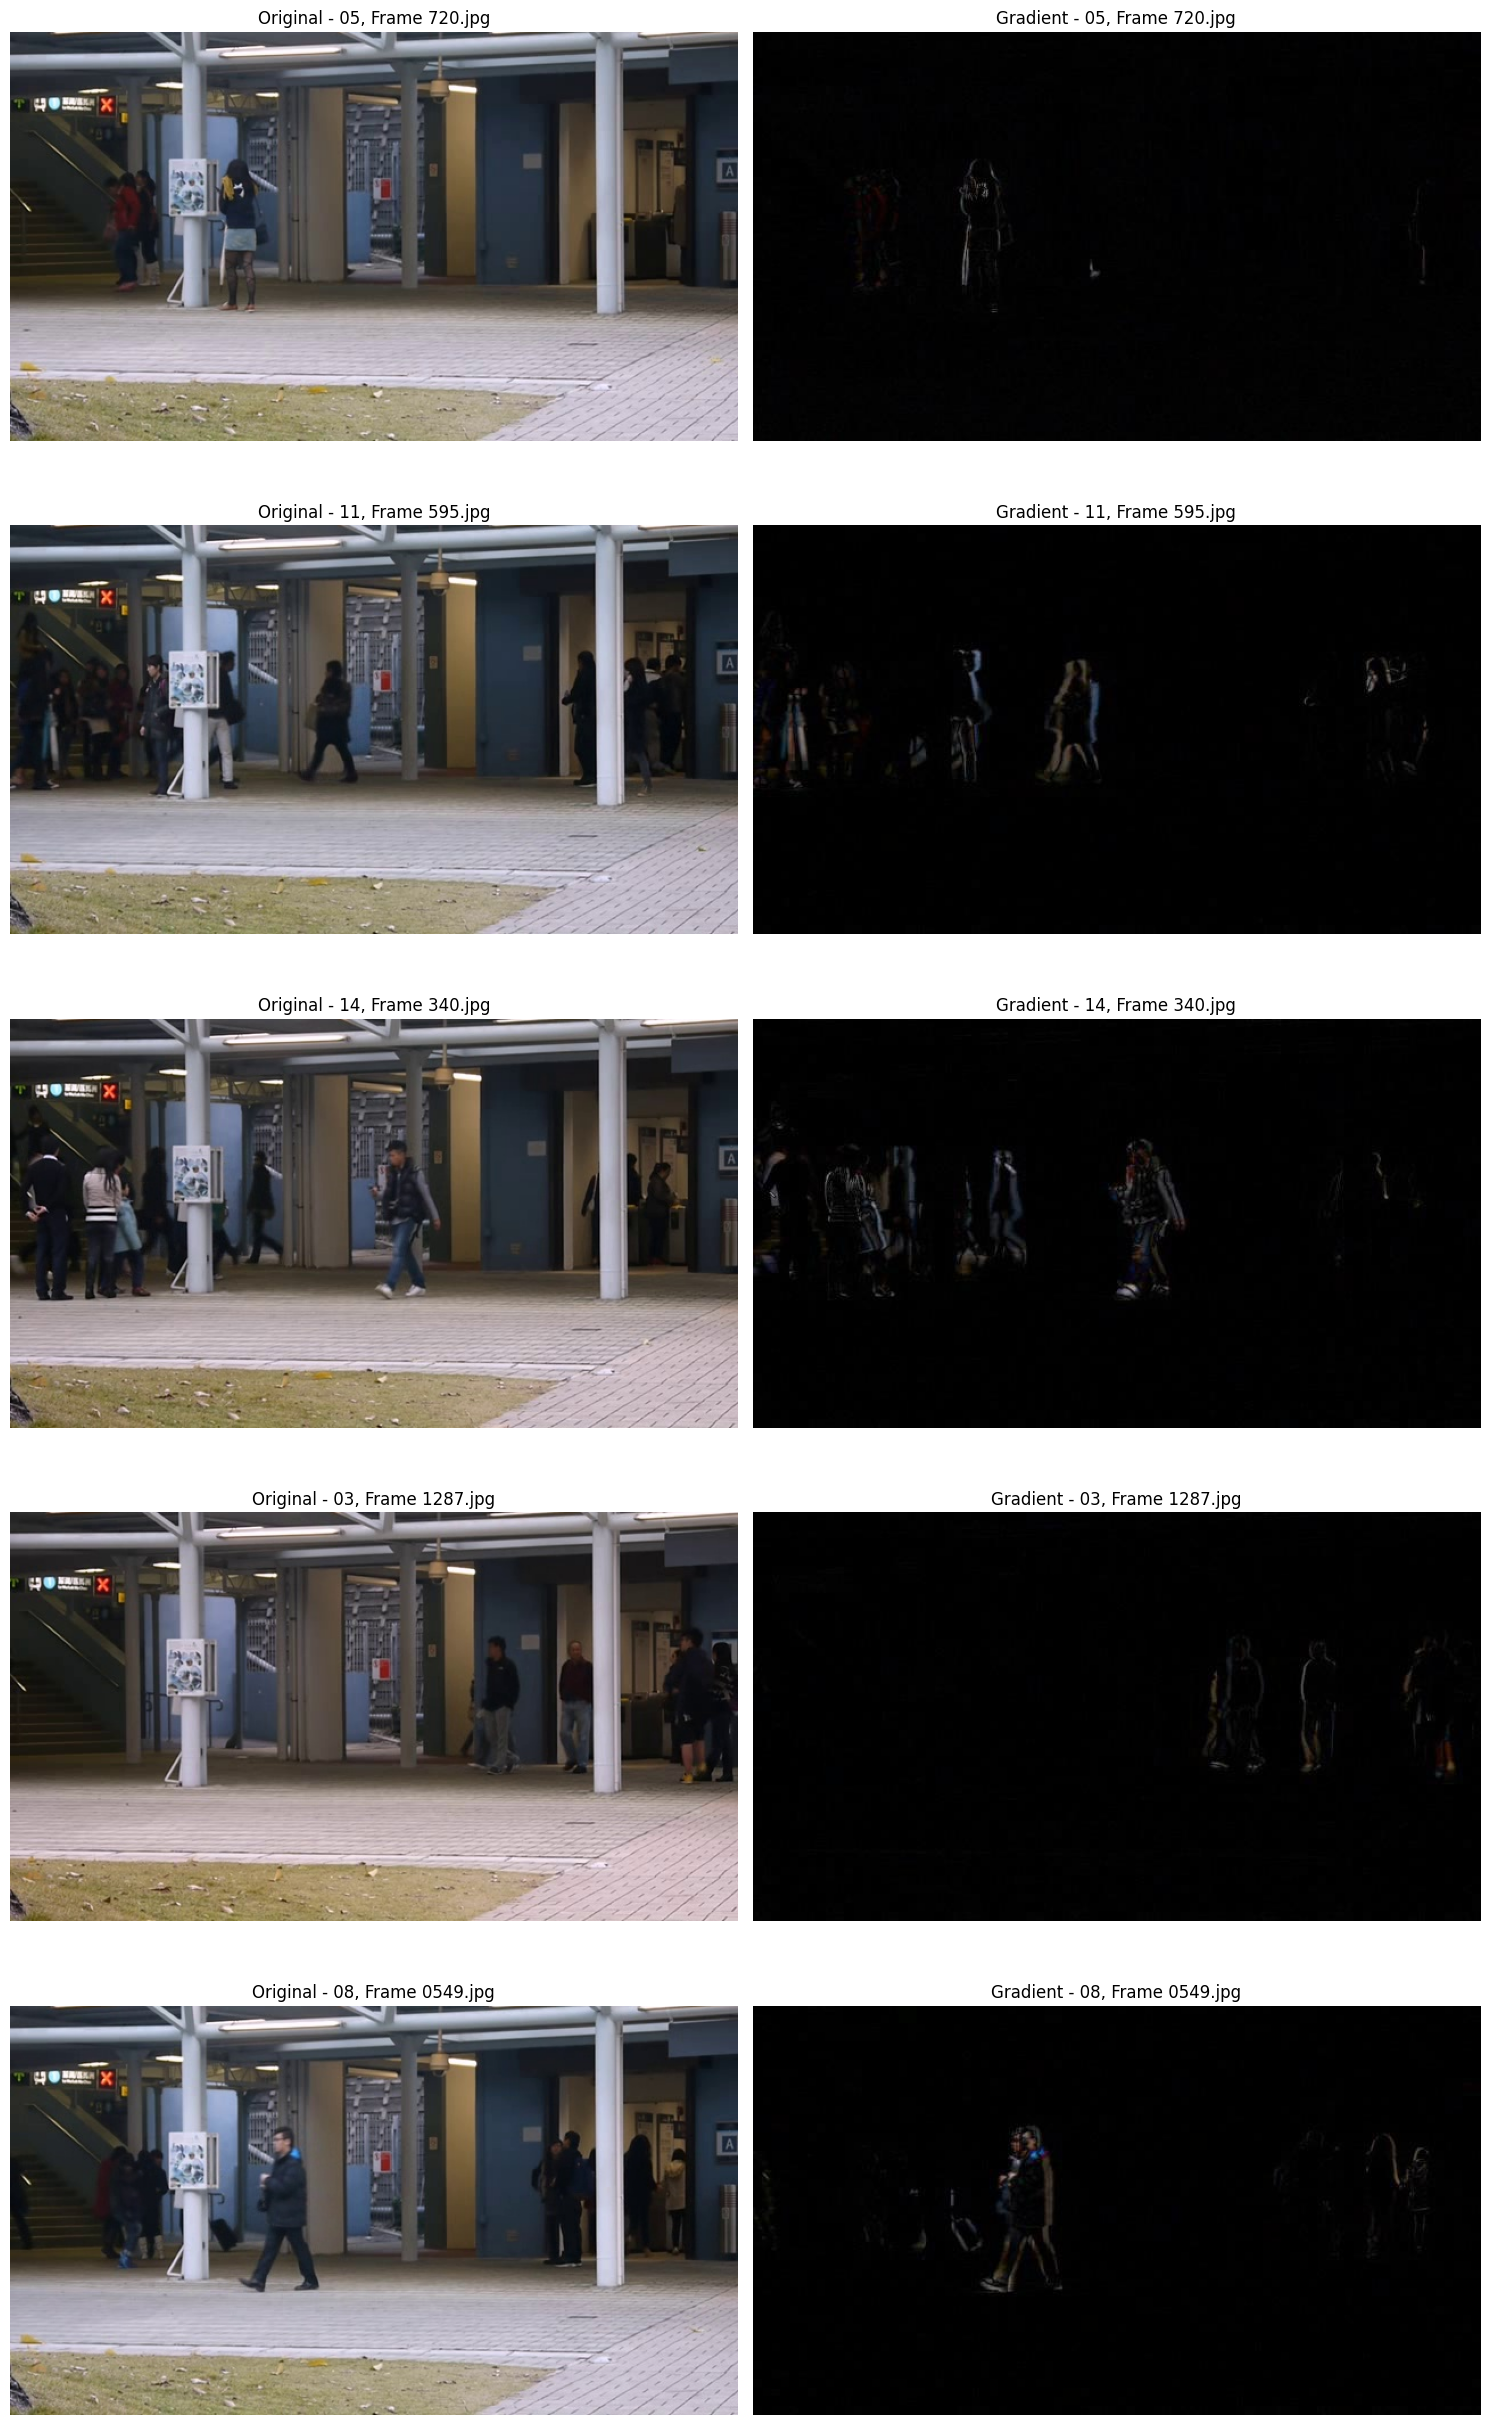

In [105]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def display_multiple_anomaly_sequences(base_path, num_images=5):
    # กำหนด path ไปยังโฟลเดอร์ frames และ gradients
    frames_path = os.path.join(base_path, "training", "frames")
    gradients_path = os.path.join(base_path, "training", "gradients2")

    # สร้างกริดสำหรับแสดงภาพ
    fig, axs = plt.subplots(num_images, 2, figsize=(15, 5 * num_images))

    for i in range(num_images):
        # สุ่มเลือกโฟลเดอร์ (video) จากโฟลเดอร์ frames
        video = random.choice(os.listdir(frames_path))

        # กำหนด path ไปยังโฟลเดอร์ที่เลือก
        video_frames_path = os.path.join(frames_path, video)
        video_gradients_path = os.path.join(gradients_path, video)

        # สุ่มเลือกไฟล์จากโฟลเดอร์ frames
        frame_filename = random.choice(os.listdir(video_frames_path))

        # กำหนด path ไปยังเฟรมต้นฉบับและ gradients ที่ตรงกัน
        original_path = os.path.join(video_frames_path, frame_filename)
        gradient_path = os.path.join(video_gradients_path, frame_filename)

        # ตรวจสอบว่าภาพเหล่านี้มีอยู่จริงหรือไม่
        if not os.path.exists(original_path):
            print(f"Original image not found at {original_path}")
            continue
        if not os.path.exists(gradient_path):
            print(f"Gradient image not found at {gradient_path}")
            continue

        # โหลดภาพ
        original_image = Image.open(original_path)
        gradient_image = Image.open(gradient_path)

        # แสดงภาพโดยใช้ matplotlib
        axs[i, 0].imshow(original_image)
        axs[i, 0].set_title(f"Original - {video}, Frame {frame_filename}")
        axs[i, 0].axis('off')

        axs[i, 1].imshow(gradient_image)
        axs[i, 1].set_title(f"Gradient - {video}, Frame {frame_filename}")
        axs[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# ตัวอย่างการสุ่มเลือก 5 ภาพและแสดงผล
display_multiple_anomaly_sequences("/notebooks/aed-mae/data/avenue", num_images=5)


# 3 ทำการ AUG ภาพ 

In [43]:
!pip install albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.7/171.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 2.6 MB/s eta 0:00:0000:0100:01mm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 8.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 kB 7.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


#  รายละเอียดของ Augmentation ที่ทำในโค้ด:
Resize:

คำสั่ง: A.Resize(height=parser.target_size[1], width=parser.target_size[0])
การทำงาน: ปรับขนาดของภาพให้ตรงกับขนาดที่กำหนดใน target_size ซึ่งในที่นี้คือ (640, 320).
Horizontal Flip:

คำสั่ง: A.HorizontalFlip(p=0.5)
การทำงาน: สุ่มพลิกภาพในแนวนอน (จากซ้ายไปขวา) ด้วยความน่าจะเป็น 50% (p=0.5).
Random Brightness and Contrast:

คำสั่ง: A.RandomBrightnessContrast(p=0.2)
การทำงาน: สุ่มปรับความสว่างและความคมชัดของภาพ โดยความน่าจะเป็น 20% (p=0.2).
Gaussian Blur:

คำสั่ง: A.GaussianBlur(p=0.1)
การทำงาน: สุ่มใช้ Gaussian Blur เพื่อเบลอภาพเล็กน้อยด้วยความน่าจะเป็น 10% (p=0.1).
ToTensorV2:

คำสั่ง: ToTensorV2()
การทำงาน: แปลงภาพจาก numpy array ให้เป็น tensor เพื่อให้ง่ายต่อการใช้ในโมเดล deep learning ที่ใช้ PyTorch.
สรุป:
โค้ดนี้ทำการปรับขนาดของภาพให้ตรงกับขนาดที่ต้องการ จากนั้นสุ่มพลิกภาพในแนวนอน ปรับความสว่างและความคมชัด รวมถึงใช้ Gaussian Blur เพื่อเพิ่มความหลากหลายให้กับข้อมูลภาพที่ใช้ในการฝึกโมเดล. ผลลัพธ์สุดท้ายจะถูกแปลงให้เป็น tensor เพื่อให้นำไปใช้งานใน PyTorch ได้ทันที.

ทุกขั้นตอนนี้เป็นการทำ Augmentation ที่ค่อนข้างทั่วไปและมีประโยชน์ในการสร้างชุดข้อมูลที่มีความหลากหลายมากขึ้นเพื่อให้โมเดลสามารถเรียนรู้ได้ดียิ่งขึ้น.

In [44]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2

class DatasetAbnormalAugAlbumentations:
    def __init__(self, parser):
        self.input_dataset_loc = os.path.join(parser.input_dataset, "training", "frames")
        self.output_dir = os.path.join(parser.output_dataset, "training", "frames")
        self.output_dir_masks = os.path.join(parser.output_dataset, "training", "masks")
        self.abnormal_source = os.path.join(parser.ubnormal_path, "abnormal_sequences")
        self.abnormal_sources = os.listdir(self.abnormal_source)
        os.makedirs(self.output_dir, exist_ok=True)
        os.makedirs(self.output_dir_masks, exist_ok=True)
        self.args = parser

        # กำหนดการทำ Augmentation ด้วย Albumentations
        self.transform = A.Compose([
            A.Resize(height=parser.target_size[1], width=parser.target_size[0]),  # ปรับขนาดภาพ
            A.HorizontalFlip(p=0.5),  # พลิกภาพแนวนอน
            A.RandomBrightnessContrast(p=0.2),  # ปรับความสว่างและความคมชัด
            A.GaussianBlur(p=0.1),  # ทำ Gaussian Blur
            ToTensorV2()
        ])

    def do_aug(self):
        videos = os.listdir(self.input_dataset_loc)

        # ใช้ tqdm เพื่อแสดง progress bar
        for video in tqdm(videos, desc="Processing videos"):
            frames = os.listdir(os.path.join(self.input_dataset_loc, video))
            frames.sort(key=lambda x: int(x.split(".")[0]))

            if not frames:
                print(f"No frames found in video: {video}")
                continue

            source, anomalies, masks = self.get_abnormal_source_seq()
            index = 0
            index_anomalies = 0
            while index < len(frames):
                image_path = os.path.join(self.input_dataset_loc, video, frames[index])
                image = cv2.imread(image_path)
                
                if image is None:
                    print(f"Failed to load image: {image_path}")
                    break

                # ทำ Augmentation ด้วย Albumentations
                augmented = self.transform(image=image)
                final_image = augmented['image'].permute(1, 2, 0).numpy()  # เปลี่ยน Tensor กลับเป็นรูปแบบภาพปกติ

                video_output_dir = os.path.join(self.output_dir, video)
                video_output_masks_dir = os.path.join(self.output_dir_masks, video)

                os.makedirs(video_output_dir, exist_ok=True)
                os.makedirs(video_output_masks_dir, exist_ok=True)

                final_image_path = os.path.join(video_output_dir, frames[index])
                target_mask_path = os.path.join(video_output_masks_dir, frames[index])

                cv2.imwrite(final_image_path, final_image)

                index += 1
                index_anomalies += 1

                if index_anomalies == len(anomalies):
                    index_anomalies = 0
                    source, anomalies, masks = self.get_abnormal_source_seq()

    def get_abnormal_source_seq(self):
        random_source = self.abnormal_sources[np.random.randint(0, len(self.abnormal_sources))]
        sequences = os.listdir(os.path.join(self.abnormal_source, random_source))
        random_sequence = sequences[np.random.randint(0, len(sequences))]
        source = os.path.join(self.abnormal_source, random_source, random_sequence)
        anomalies = os.listdir(os.path.join(source, "anomalies"))
        masks = os.listdir(os.path.join(source, "masks"))
        anomalies.sort(key=extract_number)
        masks.sort(key=extract_number)
        return source, anomalies, masks

def extract_number(filename):
    return int(''.join(filter(str.isdigit, filename)))

# กำหนดค่าเป็นตัวแปร public
ubnormal_path = "/notebooks/aed-mae/data/UBnormal_Output"
input_dataset = "/notebooks/aed-mae/data/avenue"
output_dataset = "/notebooks/aed-mae/data/avenue/Avenue_aug_abnormal_masks"
run_type = "abnormal_objects"
target_size = (640, 320)

# สร้างอ็อบเจ็กต์จากคลาส Args พร้อมกับส่งค่าเหล่านี้เป็นพารามิเตอร์
parser = Args(ubnormal_path, input_dataset, output_dataset, run_type, target_size)

# ใช้ Albumentations สำหรับการทำ Augmentation
dataset_abnormal_aug = DatasetAbnormalAugAlbumentations(parser)
dataset_abnormal_aug.do_aug()


Processing videos: 100%|██████████| 16/16 [00:22<00:00,  1.39s/it]


# แสดงตัวอย่างการ Aug ภาพ

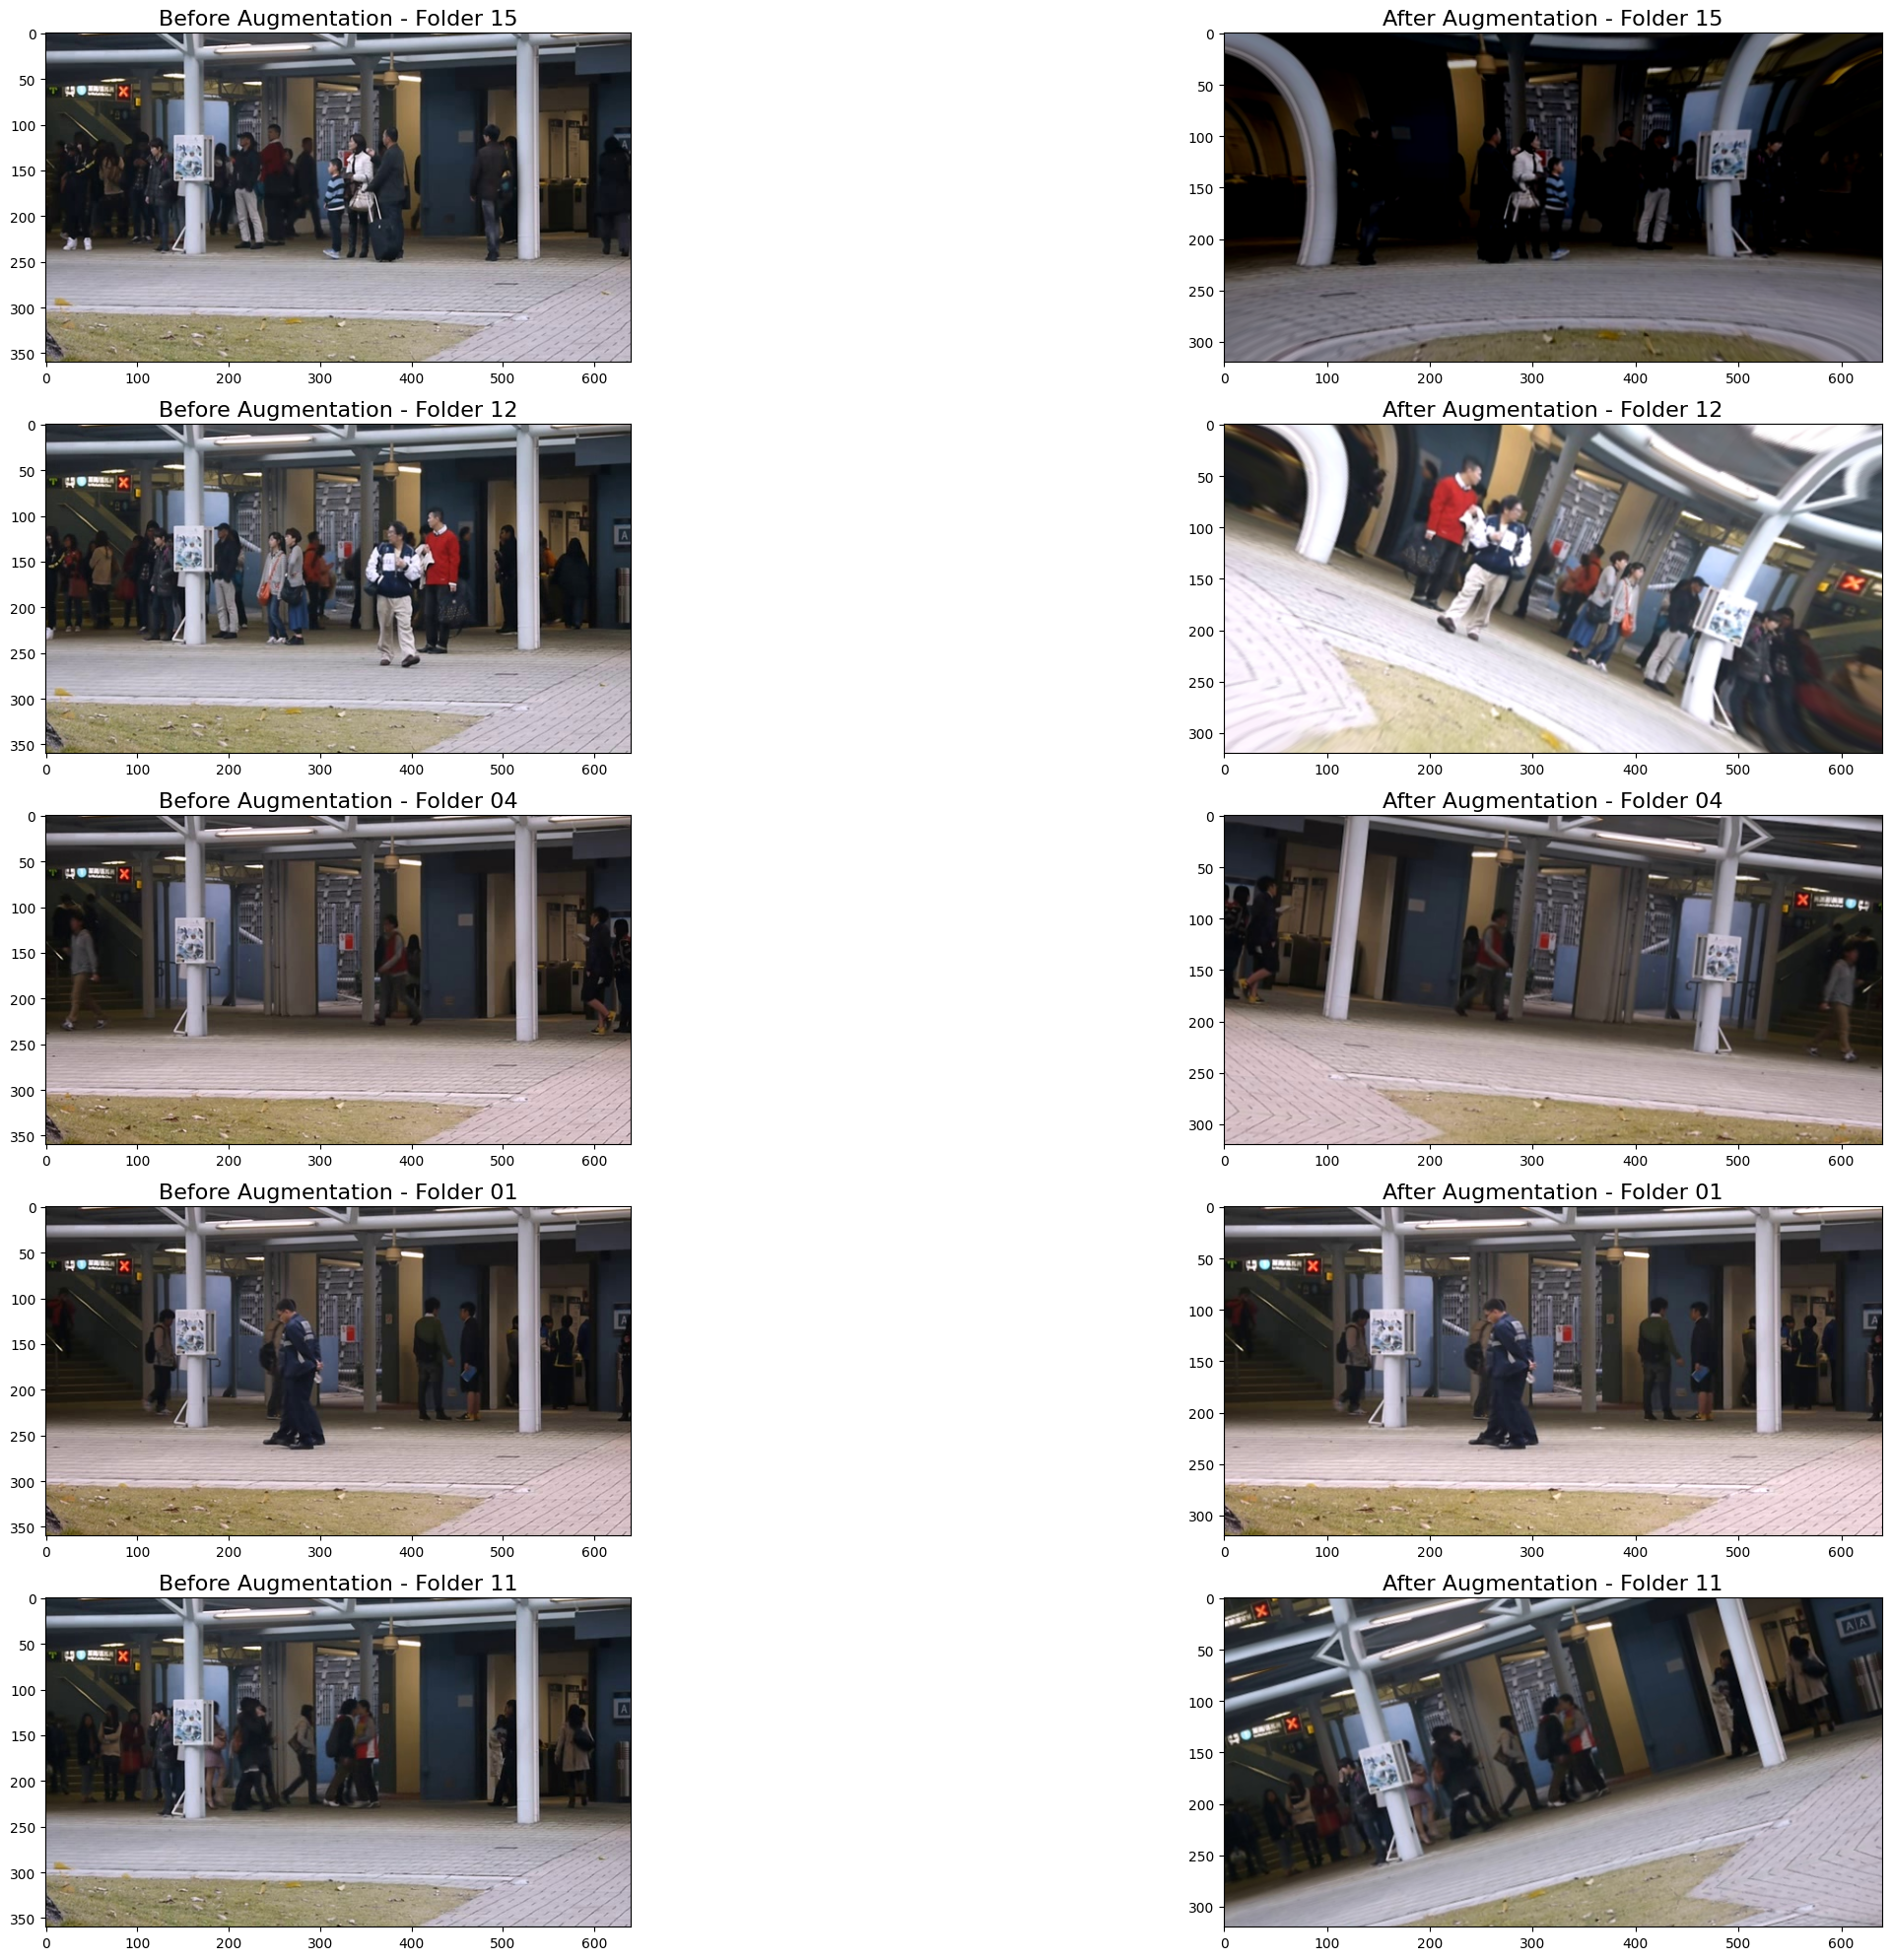

In [51]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

# ฟังก์ชันสำหรับการทำ Augmentation ที่มีการเปลี่ยนแปลงชัดเจนขึ้น
transform = A.Compose([
    A.Resize(height=320, width=640),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),  # ปรับแสงและความคมชัด
    A.Rotate(limit=45, p=0.5),  # หมุนภาพ
    A.OpticalDistortion(distort_limit=0.5, shift_limit=0.5, p=0.5),  # บิดเบี้ยวภาพ
    ToTensorV2()
])

# ตัวอย่างพาธของโฟลเดอร์ต้นทางและปลายทาง
input_base_dir = "/notebooks/aed-mae/data/avenue/training/frames"
output_base_dir = "/notebooks/aed-mae/data/avenue/Avenue_aug_abnormal_masks/training/frames"

# สุ่มเลือก 5 โฟลเดอร์
folders = os.listdir(input_base_dir)
selected_folders = random.sample(folders, min(5, len(folders)))  # เลือกสุ่ม 5 โฟลเดอร์ หรือเท่าที่มีหากน้อยกว่า 5

# เตรียมภาพเพื่อเปรียบเทียบ
plt.figure(figsize=(30, 20))  # ขยายขนาดของกราฟเป็น 2 เท่า

for i, folder in enumerate(selected_folders):
    input_dir = os.path.join(input_base_dir, folder)
    output_dir = os.path.join(output_base_dir, folder)
    
    # สุ่มเลือกภาพจากโฟลเดอร์ input
    frame_files = os.listdir(input_dir)
    frame_files.sort(key=lambda x: int(x.split(".")[0]))  # เรียงลำดับภาพตามชื่อไฟล์
    random_frame = random.choice(frame_files)  # สุ่มเลือกไฟล์ภาพ

    # โหลดภาพก่อนและหลังการประมวลผล
    before_img_path = os.path.join(input_dir, random_frame)
    after_img_path = os.path.join(output_dir, random_frame)

    before_img = cv2.imread(before_img_path)
    after_img = cv2.imread(after_img_path)

    # แปลงภาพจาก BGR เป็น RGB สำหรับการแสดงผล
    before_img_rgb = cv2.cvtColor(before_img, cv2.COLOR_BGR2RGB)
    after_img_rgb = cv2.cvtColor(after_img, cv2.COLOR_BGR2RGB)

    # ทำ Augmentation ใหม่ด้วยการตั้งค่าที่แตกต่างกัน
    augmented = transform(image=before_img_rgb)
    transformed_image = augmented['image'].permute(1, 2, 0).numpy()

    # แสดงภาพก่อนและหลังการประมวลผล
    plt.subplot(5, 2, i * 2 + 1)
    plt.imshow(before_img_rgb)
    plt.title(f'Before Augmentation - Folder {folder}', fontsize=16)

    plt.subplot(5, 2, i * 2 + 2)
    plt.imshow(transformed_image)
    plt.title(f'After Augmentation - Folder {folder}', fontsize=16)

plt.tight_layout()
plt.show()


# 4 ลองรัน

In [108]:
!ls

avenue.tar.gz	 experiments		LICENSE  __pycache__
configs		 extract_gradients.py	main.py  README.md
data		 ground_truth_demo.zip	model	 UBnormal.zip
engine_train.py  inference.py		output	 util


In [109]:
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler

# ตัวอย่างของ Dataset ง่าย ๆ
class SimpleDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)  # คืนค่าความยาวของ Dataset

    def __getitem__(self, idx):
        return self.data[idx]  # คืนค่าข้อมูลตาม index ที่กำหนด

# สร้างข้อมูลตัวอย่างสำหรับทดสอบ
data = [i for i in range(100)]  # สร้าง list ของตัวเลข 0 ถึง 99

# สร้าง Dataset จากข้อมูล
dataset = SimpleDataset(data)

# ตรวจสอบขนาดของ Dataset
print(f"Length of dataset: {len(dataset)}")  # ควรจะแสดงผล 100

# สร้าง Sampler และ DataLoader เพื่อทดสอบ
sampler = RandomSampler(dataset)
dataloader = DataLoader(dataset, sampler=sampler, batch_size=10)

# ทดลองอ่านข้อมูลจาก DataLoader
for batch in dataloader:
    print(batch)  # แต่ละ batch ควรมีขนาด 10 และเป็นค่าจาก 0 ถึง 99 ในลำดับสุ่ม


Length of dataset: 100
tensor([90, 24, 16, 14,  3, 39, 42, 56, 55, 86])
tensor([54, 17, 95, 51,  1, 64, 65, 27, 83, 35])
tensor([18, 32, 15,  9, 93, 38, 82, 66,  7, 19])
tensor([34, 52, 58, 77, 59, 70, 29, 46, 31, 97])
tensor([74,  0, 12, 73, 85, 87, 63, 98, 61, 26])
tensor([96, 72, 71, 23, 78, 36, 84, 67, 40,  5])
tensor([41, 47, 22, 80, 75, 92, 76, 57, 48, 94])
tensor([10, 21, 11,  6, 50, 43, 13, 44,  8, 89])
tensor([88, 99,  2, 37, 28, 53,  4, 30, 60, 45])
tensor([68, 33, 49, 25, 20, 81, 79, 91, 69, 62])


In [107]:
%cd /notebooks/aed-mae

/notebooks/aed-mae


# สคริปต์ Python สำหรับเปลี่ยนชื่อไฟล์ ให้ตรงกัน

In [123]:
import os

def rename_files_in_folder(folder_path):
    # เดินผ่านทุกไฟล์ในโฟลเดอร์
    for root, _, files in os.walk(folder_path):
        # คัดเฉพาะไฟล์ที่มีนามสกุล .jpg
        jpg_files = [f for f in files if f.endswith('.jpg')]
        jpg_files.sort()  # เรียงลำดับไฟล์

        total_files = len(jpg_files)
        # เปลี่ยนชื่อไฟล์ทีละไฟล์
        for i, filename in enumerate(jpg_files):
            new_filename = f"{i:04}.jpg"  # ชื่อไฟล์ใหม่ในรูปแบบ 0000.jpg
            old_file_path = os.path.join(root, filename)
            new_file_path = os.path.join(root, new_filename)

            # ตรวจสอบว่ามีไฟล์ที่ชื่อเหมือนกันอยู่แล้วหรือไม่
            if os.path.exists(new_file_path):
                continue  # ข้ามไปหากไฟล์มีอยู่แล้ว

            # เปลี่ยนชื่อไฟล์
            os.rename(old_file_path, new_file_path)

            # แสดง Progress
            progress = (i + 1) / total_files * 100
            print(f"\rProgress: {i + 1}/{total_files} ({progress:.2f}%)", end="")

# กำหนดพาธของโฟลเดอร์ training และ testing
training_folder = '/notebooks/aed-mae/data/avenue/training'
testing_folder = '/notebooks/aed-mae/data/avenue/testing'

# เรียกใช้ฟังก์ชันสำหรับโฟลเดอร์ training และ testing
rename_files_in_folder(training_folder)
rename_files_in_folder(testing_folder)

print("เส็จแล้ว")  # แสดงบรรทัดใหม่เมื่อเสร็จสิ้น

เส็จแล้ว


In [ ]:
!python3 main.py --dataset avenue

2024-08-10 23:17:29.361930: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-10 23:17:29.386860: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-10 23:17:29.833481: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
job dir: /notebooks/aed-mae
abnormal_score_func:
- L2
- L2
avenue_gt_path: /notebooks/aed-mae/data/avenue/Avenue_gt
avenue_path: /notebooks/aed-mae/data/avenue/
batch_size: 100
dataset: avenue
device: cuda
epochs: 200
grad_weighted_rec_loss: true
input_3d: true

Cannot find images for video 07, sequence 0, frame 0


In [98]:
import os

def list_files_in_directory(directory_path):
    if os.path.exists(directory_path):
        files = os.listdir(directory_path)
        print(f"Files in {directory_path}:")
        for file in files:
            print(file)
    else:
        print(f"Directory {directory_path} does not exist.")

# แสดงรายการไฟล์ในโฟลเดอร์ที่เกี่ยวข้อง
base_path = "/notebooks/aed-mae/data/avenue"
video = "07"
sequence_number = 0
frame_number = 0

original_path = os.path.join(base_path, "train", "frames", video)
anomaly_path = os.path.join(base_path, "abnormal_sequences", video, f"sequence_{sequence_number:04d}", "anomalies")
mask_path = os.path.join(base_path, "abnormal_sequences", video, f"sequence_{sequence_number:04d}", "masks")

list_files_in_directory(original_path)
list_files_in_directory(anomaly_path)
list_files_in_directory(mask_path)


Files in /notebooks/aed-mae/data/avenue/train/frames/07:
0727.jpg
0710.jpg
0966.jpg
0431.jpg
0797.jpg
0961.jpg
0222.jpg
0160.jpg
0219.jpg
0796.jpg
0023.jpg
0534.jpg
0153.jpg
0114.jpg
0891.jpg
0619.jpg
0901.jpg
0458.jpg
0272.jpg
0045.jpg
0255.jpg
1050.jpg
1086.jpg
0986.jpg
1056.jpg
0788.jpg
0714.jpg
0032.jpg
0974.jpg
0318.jpg
0759.jpg
0852.jpg
1006.jpg
0905.jpg
0823.jpg
0206.jpg
0108.jpg
0081.jpg
0356.jpg
0569.jpg
0810.jpg
0013.jpg
0205.jpg
0149.jpg
0199.jpg
1090.jpg
0551.jpg
0420.jpg
0902.jpg
0312.jpg
0313.jpg
1043.jpg
0449.jpg
1058.jpg
0987.jpg
0983.jpg
0376.jpg
0795.jpg
0418.jpg
0060.jpg
1031.jpg
0109.jpg
0940.jpg
0343.jpg
0339.jpg
0345.jpg
0772.jpg
0602.jpg
0520.jpg
0196.jpg
0066.jpg
0381.jpg
0047.jpg
0658.jpg
0696.jpg
0725.jpg
0487.jpg
0451.jpg
0766.jpg
0359.jpg
0466.jpg
0572.jpg
0310.jpg
0554.jpg
0505.jpg
1073.jpg
0682.jpg
0111.jpg
0358.jpg
0672.jpg
0945.jpg
0130.jpg
0562.jpg
0760.jpg
1093.jpg
0920.jpg
0076.jpg
0925.jpg
0753.jpg
0331.jpg
0955.jpg
0674.jpg
0744.jpg
0340.jpg
0675.jp

In [102]:
import os

def check_matching_original_and_anomaly(base_path, video, sequence_number=0):
    # กำหนด path ไปยังเฟรมต้นฉบับและ anomaly ที่สร้างขึ้น
    original_path = os.path.join(base_path, "train", "frames", video)
    anomaly_path = os.path.join(base_path, "abnormal_sequences", video, f"sequence_{sequence_number:04d}", "anomalies")

    if not os.path.exists(original_path):
        print(f"Original frames directory does not exist: {original_path}")
        return

    if not os.path.exists(anomaly_path):
        print(f"Anomalies directory does not exist: {anomaly_path}")
        return

    original_files = {os.path.splitext(f)[0] for f in os.listdir(original_path) if f.endswith('.jpg')}
    anomaly_files = {os.path.splitext(f)[0] for f in os.listdir(anomaly_path) if f.endswith('.png')}
    
    matching_files = original_files.intersection(anomaly_files)
    non_matching_files = anomaly_files - original_files
    
    if matching_files:
        print("Matching files between original frames and anomalies:")
        for file in matching_files:
            print(f"{file}.jpg matches with {file}.png")
    else:
        print("No matching files found between original frames and anomalies.")
    
    if non_matching_files:
        print("Anomalies without matching original frames:")
        for file in non_matching_files:
            print(f"{file}.png has no corresponding {file}.jpg")

# ตรวจสอบการจับคู่ระหว่างเฟรมต้นฉบับและ anomaly
check_matching_original_and_anomaly("/notebooks/aed-mae/data/avenue", "07", sequence_number=0)


Matching files between original frames and anomalies:
1061.jpg matches with 1061.png
1018.jpg matches with 1018.png
1059.jpg matches with 1059.png
1055.jpg matches with 1055.png
1047.jpg matches with 1047.png
1074.jpg matches with 1074.png
1027.jpg matches with 1027.png
1095.jpg matches with 1095.png
1017.jpg matches with 1017.png
1066.jpg matches with 1066.png
1005.jpg matches with 1005.png
1026.jpg matches with 1026.png
1021.jpg matches with 1021.png
1068.jpg matches with 1068.png
1039.jpg matches with 1039.png
1090.jpg matches with 1090.png
1030.jpg matches with 1030.png
1069.jpg matches with 1069.png
1053.jpg matches with 1053.png
1011.jpg matches with 1011.png
1098.jpg matches with 1098.png
1013.jpg matches with 1013.png
1024.jpg matches with 1024.png
1019.jpg matches with 1019.png
1094.jpg matches with 1094.png
1071.jpg matches with 1071.png
1085.jpg matches with 1085.png
1078.jpg matches with 1078.png
1041.jpg matches with 1041.png
1031.jpg matches with 1031.png
1088.jpg matches

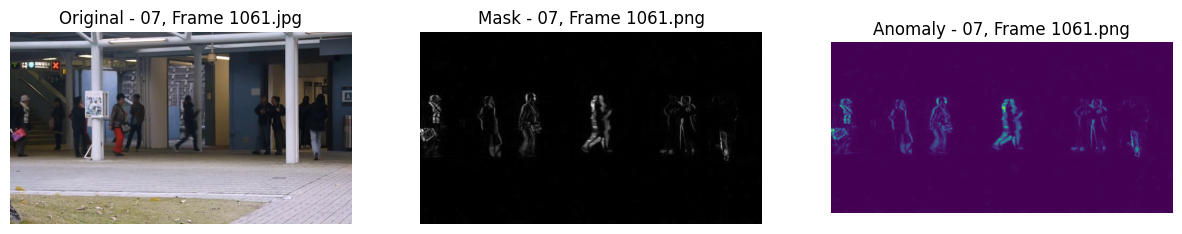

In [103]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_anomaly_sequence(base_path, video, sequence_number=0, frame_filename="1061.png"):
    # กำหนด path ไปยังเฟรมต้นฉบับ, anomaly และ mask ที่สร้างขึ้น
    original_path = os.path.join(base_path, "train", "frames", video, f"{frame_filename[:-4]}.jpg")
    anomaly_path = os.path.join(base_path, "abnormal_sequences", video, f"sequence_{sequence_number:04d}", "anomalies", frame_filename)
    mask_path = os.path.join(base_path, "abnormal_sequences", video, f"sequence_{sequence_number:04d}", "masks", frame_filename)

    # ตรวจสอบว่าภาพเหล่านี้มีอยู่จริงหรือไม่
    if not os.path.exists(original_path) or not os.path.exists(anomaly_path) or not os.path.exists(mask_path):
        print(f"Cannot find images for video {video}, sequence {sequence_number}, frame {frame_filename}")
        return

    # โหลดภาพ
    original_image = Image.open(original_path)
    anomaly_image = Image.open(anomaly_path)
    mask_image = Image.open(mask_path)

    # แสดงภาพโดยใช้ matplotlib
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    axs[0].imshow(original_image)
    axs[0].set_title(f"Original - {video}, Frame {frame_filename[:-4]}.jpg")
    axs[0].axis('off')
    
    axs[1].imshow(mask_image, cmap='gray')
    axs[1].set_title(f"Mask - {video}, Frame {frame_filename}")
    axs[1].axis('off')
    
    axs[2].imshow(anomaly_image)
    axs[2].set_title(f"Anomaly - {video}, Frame {frame_filename}")
    axs[2].axis('off')
    
    plt.show()

# ตัวอย่างการแสดงภาพที่จับคู่กัน
display_anomaly_sequence("/notebooks/aed-mae/data/avenue", "07", sequence_number=0, frame_filename="1061.png")


# สร้าง Seq

In [109]:
import os

def check_annotations_structure(base_path, frames_path, annotations_path):
    videos = [video for video in os.listdir(frames_path) if os.path.isdir(os.path.join(frames_path, video))]
    
    for video in videos:
        expected_annotations_dir = os.path.join(annotations_path, video)
        
        # ตรวจสอบว่ามีโฟลเดอร์ในตำแหน่งที่ถูกต้องหรือไม่
        if os.path.exists(expected_annotations_dir):
            print(f"Annotations directory found for {video}.")
            
            # ตรวจสอบว่าไฟล์ .png ที่ต้องการมีอยู่จริงในโฟลเดอร์นี้หรือไม่
            png_files = [f for f in os.listdir(expected_annotations_dir) if f.endswith('.png')]
            if png_files:
                print(f"Found {len(png_files)} PNG files in {expected_annotations_dir}.")
            else:
                print(f"No PNG files found in {expected_annotations_dir}.")
        else:
            # แสดงตำแหน่งที่คาดหวังไว้เพื่อช่วยตรวจสอบว่า path ถูกต้องหรือไม่
            print(f"Annotations directory expected at: {expected_annotations_dir}")
            print(f"Annotations directory missing for {video}.")

# ตัวอย่างการใช้งาน
ubnormal_base_path = "/notebooks/aed-mae/data/UBnormal_new_structure"
ubnormal_train_frames_path = os.path.join(ubnormal_base_path, "train", "frames")
ubnormal_train_annotations_path = os.path.join(ubnormal_base_path, "train", "annotations")

# รันการตรวจสอบ path สำหรับ UBnormal dataset
check_annotations_structure(ubnormal_base_path, ubnormal_train_frames_path, ubnormal_train_annotations_path)


Annotations directory found for Scene5.
Found 8408 PNG files in /notebooks/aed-mae/data/UBnormal_new_structure/train/annotations/Scene5.
Annotations directory found for Scene19.
Found 7216 PNG files in /notebooks/aed-mae/data/UBnormal_new_structure/train/annotations/Scene19.
Annotations directory found for Scene18.
Found 7206 PNG files in /notebooks/aed-mae/data/UBnormal_new_structure/train/annotations/Scene18.
Annotations directory found for Scene9.
Found 10824 PNG files in /notebooks/aed-mae/data/UBnormal_new_structure/train/annotations/Scene9.
Annotations directory found for Scene1.
Found 7077 PNG files in /notebooks/aed-mae/data/UBnormal_new_structure/train/annotations/Scene1.
Annotations directory found for Scene28.
Found 7216 PNG files in /notebooks/aed-mae/data/UBnormal_new_structure/train/annotations/Scene28.
Annotations directory found for Scene24.
Found 7216 PNG files in /notebooks/aed-mae/data/UBnormal_new_structure/train/annotations/Scene24.
Annotations directory found for 

In [112]:
import os

def summarize_frames_annotations_match(base_path, frames_path, annotations_path):
    videos = [video for video in os.listdir(frames_path) if os.path.isdir(os.path.join(frames_path, video))]
    
    total_videos = len(videos)
    total_matched = 0
    total_mismatched = 0
    total_missing_annotations = 0

    for video in videos:
        frames_dir = os.path.join(frames_path, video)
        annotations_dir = os.path.join(annotations_path, video)
        
        if not os.path.exists(annotations_dir):
            total_missing_annotations += 1
            continue
        
        frames = sorted(os.listdir(frames_dir))
        annotations = sorted([f for f in os.listdir(annotations_dir) if f.endswith('_gt.png')])
        
        if len(frames) != len(annotations):
            total_mismatched += 1
        else:
            total_matched += 1

    # Summary output
    print(f"Total videos: {total_videos}")
    print(f"Matched frames and annotations: {total_matched}")
    print(f"Mismatched frames and annotations: {total_mismatched}")
    print(f"Videos with missing annotations: {total_missing_annotations}")

# ตัวอย่างการใช้งาน
ubnormal_base_path = "/notebooks/aed-mae/data/UBnormal_new_structure"
ubnormal_train_frames_path = os.path.join(ubnormal_base_path, "train", "frames")
ubnormal_train_annotations_path = os.path.join(ubnormal_base_path, "train", "annotations")

# รันการสรุปผลการตรวจสอบ
summarize_frames_annotations_match(ubnormal_base_path, ubnormal_train_frames_path, ubnormal_train_annotations_path)


Total videos: 29
Matched frames and annotations: 0
Mismatched frames and annotations: 29
Videos with missing annotations: 0


# แสดงตัวอย่าง

  0%|          | 0/543 [00:00<?, ?it/s]

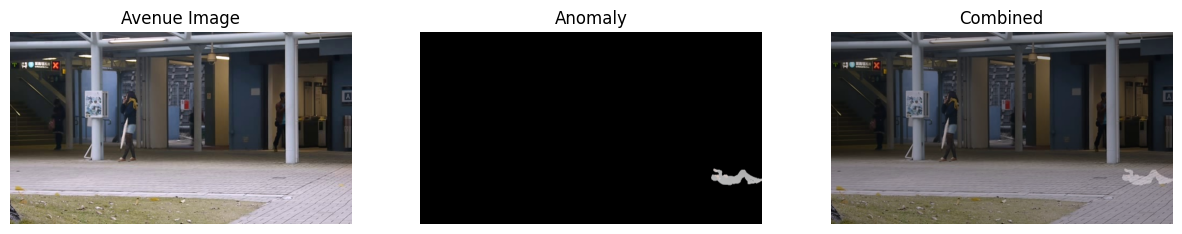

  0%|          | 0/543 [00:00<?, ?it/s]


In [66]:
import glob
import os.path
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

class AbnormalSequences:
    def __init__(self, parser):
        self.ubnormal_frames_path = os.path.join(parser.ubnormal_path, "frames")
        self.ubnormal_annotations = os.path.join(parser.ubnormal_path, "annotations")
        os.makedirs(parser.output_dataset, exist_ok=True)
        self.store_dir_sequences = parser.output_dataset
        self.args = parser

    def create_abnormal_sequences(self):
        avenue_sample = self.display_avenue_sample()
        if avenue_sample is None:
            print("No Avenue sample available")
            return
        
        for scenario in tqdm(os.listdir(self.ubnormal_frames_path)):
            frames_dir = os.path.join(self.ubnormal_frames_path, scenario)
            annotations_dir = os.path.join(self.ubnormal_annotations, f"{scenario}_annotations")
            if os.path.isdir(frames_dir) and os.path.isdir(annotations_dir):
                frames = sorted(glob.glob(os.path.join(frames_dir, "*.png")), key=lambda x: int(os.path.basename(x).split(".")[0]))
                annotations = sorted(glob.glob(os.path.join(annotations_dir, "*.png")), key=lambda x: int(os.path.basename(x).split("_")[-2]))
                tracks_path = os.path.join(annotations_dir, f"{scenario}_tracks.txt")
                if os.path.exists(tracks_path):
                    tracks = np.loadtxt(tracks_path, delimiter=",", dtype=float).astype(dtype=np.int32)
                    if len(tracks.shape) == 1:
                        tracks = np.array([tracks])
                    for t, track in enumerate(tracks):
                        selected_annotations = annotations[track[1]:track[2]]
                        selected_frames = frames[track[1]:track[2]]
                        object_no = track[0]
                        for i, frame_path in enumerate(selected_frames):
                            image = cv2.imread(frame_path)
                            annotation = cv2.imread(selected_annotations[i])
                            mask = (annotation == object_no) * 1
                            mask = mask[:image.shape[0], :image.shape[1], :]
                            if mask.sum() < 800:
                                break
                            anomaly = image * mask
                            sequence_path = os.path.join(self.store_dir_sequences, scenario, f"sequence_{t:04d}")
                            os.makedirs(os.path.join(sequence_path, "masks"), exist_ok=True)
                            os.makedirs(os.path.join(sequence_path, "anomalies"), exist_ok=True)
                            anomaly = cv2.resize(anomaly.astype(np.uint8), self.args.target_size)
                            mask *= 255
                            mask = cv2.resize(mask.astype(np.uint8), self.args.target_size)
                            cv2.imwrite(os.path.join(sequence_path, "anomalies", f"{i}.png"), anomaly)
                            cv2.imwrite(os.path.join(sequence_path, "masks", f"{i}.png"), mask)

                            # Resize anomaly and mask to match Avenue sample size
                            anomaly_resized = cv2.resize(anomaly, (avenue_sample.shape[1], avenue_sample.shape[0]))
                            mask_resized = cv2.resize(mask, (avenue_sample.shape[1], avenue_sample.shape[0]))
                            
                            # Display combined results
                            self.display_combined_results(avenue_sample, anomaly_resized, mask_resized)
                            return  # Display only one combined image

    def display_combined_results(self, avenue_image, anomaly_image, mask_image):
        # Combine anomaly and mask for visualization
        combined = cv2.addWeighted(avenue_image, 0.7, anomaly_image, 0.3, 0)
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title('Avenue Image')
        plt.imshow(cv2.cvtColor(avenue_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.title('Anomaly')
        plt.imshow(cv2.cvtColor(anomaly_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.title('Combined')
        plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    def display_avenue_sample(self):
        avenue_frames_path = os.path.join(self.args.input_dataset, "training", "frames")
        if os.path.exists(avenue_frames_path):
            frames = sorted(glob.glob(os.path.join(avenue_frames_path, "**/*.jpg"), recursive=True))
            sample_frame = np.random.choice(frames)
            return cv2.imread(sample_frame)
        return None

import argparse

def get_arg_parser():
    parser = argparse.ArgumentParser('MAE abnormal', add_help=False)
    parser.add_argument("--ubnormal_path", type=str, default="/notebooks/aed-mae/data/UBnormal_Output")
    parser.add_argument("--input_dataset", type=str, default="/notebooks/aed-mae/data/avenue")
    parser.add_argument("--output_dataset", type=str, default="/notebooks/aed-mae/data/avenue/Avenue_aug_abnormal_masks")
    parser.add_argument("--run_type", type=str, default="abnormal_objects")
    parser.add_argument('--target_size', default=(640, 320), type=tuple, help='images input size')
    args = parser.parse_args([])
    return args

# Initializing parser and creating abnormal sequences
args = get_arg_parser()
abnormal_sequences = AbnormalSequences(args)
abnormal_sequences.create_abnormal_sequences()


# จัดโครงสร้างไฟล์